<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/08_tensorflow_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#down grade Tensorflow
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 2.9 MB 39.2 MB/s 
     |████████████████████████████████| 3.8 MB 52.0 MB/s 
     |████████████████████████████████| 462 kB 35.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68714 sha256=efa850b04a255f8e5169889193c8ef726a50ab647c28c95c4ec62c424718e160
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

## Check GPU

to use mixed precision training we need GPU needs a score of 7.0+ (Tesla T4 - Google Colab)

In [2]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-3b8fff9d-cf81-fef2-a60e-ddc972e1062d)


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-12 12:50:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-12 12:50:30 (74.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import compare_historys , plot_loss_curves , create_tensorboard_callback 

## Use tensorflow dataset (TFDS) to download data

In [6]:
#Get tensorflow datasets
import tensorflow_datasets as tfds

In [10]:
#list all the available datasets

datasets_list = tfds.list_builders()
print('food101' in datasets_list)

True


In [11]:
#load in the data
(train_data , test_data) , ds_info = tfds.load(name = 'food101',
                                               split = ['train','validation'],
                                               shuffle_files = True,
                                               as_supervised = True,
                                               with_info = True) # data gets returned in tuple (data,label)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteHINI0T/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteHINI0T/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [14]:
#features of food101 from tfds
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [17]:
#get the class names
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

#check the data:
* class names
* the shape
* the data type
* what the labels look like
* do the labels match up with the class names?

In [35]:
train_one_sample = train_data.take(1)

In [36]:
train_one_sample # shape is in (image_tensor , label)

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [37]:
#output info about our training sample

for image,label in train_one_sample:
  print(f'''
  Image shape : {image.shape}
  Image datatype : {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (strform):{class_names[label.numpy()]}
  ''')


  Image shape : (341, 512, 3)
  Image datatype : <dtype: 'uint8'>
  Target class from Food101 (tensor form): 98
  Class name (strform):tiramisu
  


In [38]:
#what does our image tensor from TFDS look like?
image

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  0,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  2,   2,   0],
        [  2,   2,   0],
        [  3,   3,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       ...,

       [[143,  75,  10],
        [149,  81,  16],
        [150,  85,  19],
        ...,
        [162,  88,  25],
        [150,  79,  17],
        [135,  65,   5]],

       [[144,  76,  11],
        [152,  84,  19],
        [145,  80,  16],
        ...,
        [126,  60,  12],
        [111,  50,   3],
        [ 95,  37,   0]],

       [[145,  77,  14],
        [150,  82,  19],
        [139,  74,  10],
        ...,
        [ 89,  35,   

In [39]:
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

Plot an image from Tensorflow Tensor

(-0.5, 511.5, 340.5, -0.5)

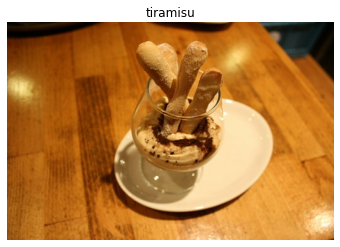

In [40]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

## Create preprocessing functions for our data:

What we know about our data:
* In 'uint8' datatype
* Comprised of all different size tensors
* not scaled
* sizes are different

NN likes :

* batches of the same size
* scaled
* in float16/float32

In [43]:
# make a function for preprocessing images

def preprocess_img(image,label,image_shape =224):
  '''
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  images to [img_shape , image_shape, colour_channels]
  '''

  image = tf.image.resize(image,[image_shape,image_shape])
  return tf.cast(image,tf.float32),label

In [57]:
preprocessed_img = preprocess_img(image,label,224)[0]

## Batch & prepare datasets

We're now going to make our data input pipeline really fast

Reference:

https://www.tensorflow.org/guide/data_performance

In [63]:
# Map preprocessing function to train (and parallelize)
train_data = train_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Map preprocessing function to train (and parallelize)
test_data = test_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
test_data = test_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

In [64]:
train_data,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

## Create modelling callbacks

* TensorBoard log training results
* ModelCheckpiint callback
* Early stopping

In [98]:
#create tensor callback import from helper functions
from helper_functions import create_tensorboard_callback

checkpoint_path = 'model_checkpoints/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_accuracy',
                                                      save_best_only = True,
                                                      save_weights_only = True)

early_stopping = tf.keras.callbacks.EarlyStopping(min_delta = 0.01,
                                                  patience = 2 ,
                                                  verbose = 1,
                                                  monitor = 'val_accuracy')

## mixed precision training

- when using this you have to ensure your output dtype is float32



In [90]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('float32')

In [91]:
mixed_precision.global_policy()

<Policy "float32">

## Build feature extraction model

In [92]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape =input_shape , name = 'input_layer')

x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation('softmax', dtype = tf.float32 , name = 'softmax_float32')(x)
model = tf.keras.Model(inputs,outputs)

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [93]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

In [94]:
for layer in model.layers:
  print(layer.dtype, layer.trainable , layer.name , layer.dtype_policy)

float32 True input_layer <Policy "float32">
float32 False efficientnetb0 <Policy "float32">
float32 True global_average_pooling2d_2 <Policy "float32">
float32 True dense_2 <Policy "float32">
float32 True softmax_float32 <Policy "float32">


In [95]:
for layer in base_model.layers[:10]:
  print(layer.dtype, layer.trainable , layer.name , layer.dtype_policy)

float32 False input_4 <Policy "float32">
float32 False rescaling_3 <Policy "float32">
float32 False normalization_3 <Policy "float32">
float32 False stem_conv_pad <Policy "float32">
float32 False stem_conv <Policy "float32">
float32 False stem_bn <Policy "float32">
float32 False stem_activation <Policy "float32">
float32 False block1a_dwconv <Policy "float32">
float32 False block1a_bn <Policy "float32">
float32 False block1a_activation <Policy "float32">


In [ ]:
initial_epoch = 3
history =   model.fit(train_data,
                      epochs = initial_epoch,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = int(0.15*len(test_data)),
                      callbacks = [create_tensorboard_callback(dir_name = 'milestone_1',
                                                              experiment_name = 'base_model'),
                                  early_stopping,
                                  model_checkpoint]
                      )

Saving TensorBoard log files to: milestone_1/base_model/20220112-142350
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2368/2368 [==============================] - 317s 133ms/step - loss: 1.2158 - accuracy: 0.6836 - val_loss: 1.1083 - val_accuracy: 0.7031
Epoch 2/3
1516/2368 [==================>...........] - ETA: 1:45 - loss: 1.0915 - accuracy: 0.7158

In [ ]:
model.summary()

In [ ]:
model.evaluate(test_data)

In [ ]:
plot_loss_curves(history)

Fine tuning model:
Experiment 2 -
unfreeze 10 layers and refit model

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False